In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pfbmod import forward_pfb as pfb
from scipy.interpolate import CubicSpline
from cycler import cycler
import palettable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [2]:
plt.rc('axes', prop_cycle=(cycler('color', palettable.colorbrewer.qualitative.Dark2_8.mpl_colors)))

In [3]:
def mycorr(a,b):
    myxcorr=np.zeros(len(a),dtype=a.dtype)
    print("len is", len(a))
    for i in range(len(a)):
        s=0
        for j in range(len(a)):
            s+=a[j]*np.conj(b[j-i])
        myxcorr[i]=s
    return myxcorr

In [97]:
N=4096
bigN=4096*100
np.random.seed(42)
n=np.arange(0,bigN)
k1=1835.1
k2=1845.1
delay=-80000.5
# print(delay%(2*np.pi))
d=200000
dk = 0.05 # BW of 6 kHz
y=np.sinc(dk*(n-d)/N)*np.cos(2*np.pi*k1*(n-d)/N)#+np.sinc(dk*(n-d)/N)*np.cos(2*np.pi*k2*(n-d)/N)#+0.2*np.random.randn(len(n))
y2=np.sinc(dk*(n-delay-d)/N)*np.cos(2*np.pi*k1*(n-delay-d)/N)#+np.sinc(dk*(n-delay-d)/N)*np.cos(2*np.pi*k2*(n-delay-d)/N)#+0.2*np.random.randn(len(n))


# z=np.zeros(2*N,dtype=y.dtype)
# z2=np.zeros(2*N,dtype=y.dtype)
# z[:N]=y
# z2[:N]=y2
# ft = np.fft.fft(z)
# ft2=np.fft.fft(z2)

# k=510
# y=np.cos(2*np.pi*k*n/N)+np.random.randn(N)
# y2=np.cos(2*np.pi*k*n/N - dphase)+np.random.randn(N)
# ft1=np.fft.fft(y)
# ft3=np.fft.fft(y2)


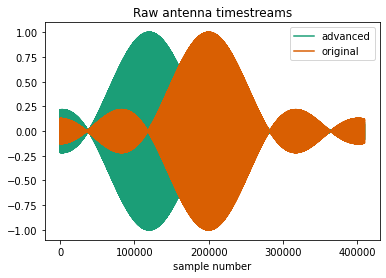

In [98]:
plt.plot(y2.real,label='advanced')
plt.title('Raw antenna timestreams')
plt.plot(y,label='original')# plt.xlim(0,200)
plt.xlabel('sample number')
plt.legend()

In [29]:
4096*4

16384

In [39]:
yy=y.reshape(-1,4096)
yy2=y2.reshape(-1,4096)
f1=np.fft.rfft(yy,axis=1)
f2=np.fft.rfft(yy2,axis=1)
# f1=pfb(y,nchan=8192)
# f2=pfb(y2,nchan=8192)

In [11]:
f1.shape

(100, 2049)

In [22]:
xcorrtemp=f1*np.conj(f2)

Text(0.5, 0, 'channels')

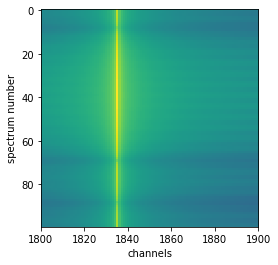

In [23]:
plt.imshow(np.log10(np.abs(xcorrtemp)),interpolation='none',aspect='equal')#,cmap=palettable.colorbrewer.diverging.PuOr_8.mpl_colormap)
plt.xlim(1800,1900)
plt.ylabel('spectrum number')

plt.xlabel('channels')

1835

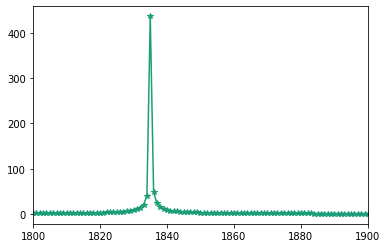

In [40]:
plt.plot(np.abs(f1[20,:]),'-*')
np.argmax(np.abs(f1[20,:]))
plt.xlim(1800,1900)
np.argmax(np.abs(f1[20,:8192]))

In [41]:
## Correlate the whole thing

a=np.zeros(2*len(y),dtype=y.dtype)
a2=np.zeros(2*len(y2),dtype=y.dtype)
a[:len(y)]=y.copy()
a2[:len(y2)]=y2.copy()
xcorrtime1=np.fft.irfft(np.fft.rfft(a)*np.conj(np.fft.rfft(a2)))

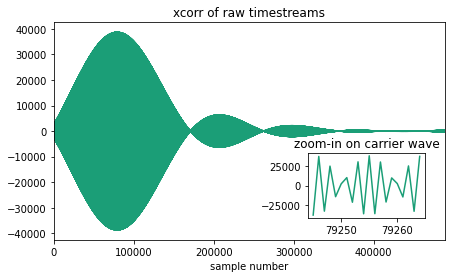

In [88]:
f=plt.gcf()
f.set_size_inches(7,4)
plt.plot(xcorrtime1)
m=np.argmax(xcorrtime1)
# print(m)
plt.title('xcorr of raw timestreams')
plt.xlabel('sample number')
plt.xlim(0,m+100*4096)
ax=plt.gca()
# m=80000
axins = ax.inset_axes((0.65,0.1,.3,.3))
axins.set_title('zoom-in on carrier wave')
axins.plot(np.arange(m-10,m+10),xcorrtime1[m-10:m+10])

In [39]:
4096/0.4

10240.0

In [ ]:
plt.plot(xcorrtime1[::4096])
m=np.argmax(xcorrtime1[::4096])
print(m)
# plt.xlim(m-10,m+10)

In [43]:
Nsmall=f1.shape[0]
print(Nsmall)
# chans=np.hstack([np.linspace(1835-4,1835),np.linspace(1845-4,1845+5)]).astype(int)
chans=[1835]

# chans=np.arange(7337,7345).astype(int)
xcorrtime2=np.zeros((2*Nsmall,len(chans)),dtype='complex128')
for i,chan in enumerate(chans):
    p0=np.zeros(2*Nsmall,dtype=f1.dtype)
    p1=np.zeros(2*Nsmall,dtype=f2.dtype)
    p0[:Nsmall]=f1[:Nsmall,chan].flatten()
    p1[:Nsmall]=f2[:Nsmall,chan].flatten()
    ft1=np.fft.fft(p0)
    ft2=np.fft.fft(p1)
    xcorr=ft1*np.conj(ft2)
    xcorrtime2[:,i]=np.fft.ifft(xcorr)

100


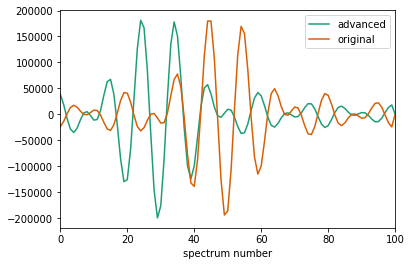

In [77]:

plt.plot(p1.real*100,label='advanced')# plt.xlim(0,200)
plt.plot(p0.real*100,label='original')
plt.xlabel('spectrum number')
plt.xlim(0,100)
plt.legend()

In [44]:
xcorr2sum = np.sum(xcorrtime2,axis=1)

In [33]:
np.argmax(np.abs(xcorr2sum))

18

In [10]:
30000.5/4096

7.3243408203125

In [14]:
np.angle(xcorrtime2[7])

array([-1.22423725, -2.75361614])

In [11]:
np.angle(xcorrtime2[7])[0]*4096/(2*np.pi)/(1835)

-0.4349202225169578

In [ ]:
8-31539.5/4096

In [ ]:
plt.plot(np.abs(xcorr2sum))
plt.xlim(0,20)

In [ ]:
np.angle(xcorrtime2[7])

In [78]:
amp=np.sum(np.real(xcorr2sum)*xcorrtime1[::4096])/np.sum(np.real(xcorr2sum)**2)

(0.0, 100.0)

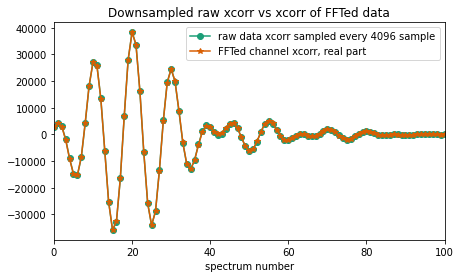

In [99]:
f=plt.gcf()
f.set_size_inches(7,4)

plt.plot(xcorrtime1[::4096],'-o',label='raw data xcorr sampled every 4096 sample')
plt.plot(amp*np.real(xcorr2sum),'-*',label='FFTed channel xcorr, real part')
plt.legend()
plt.title('Downsampled raw xcorr vs xcorr of FFTed data')
plt.xlabel('spectrum number')
plt.xlim(0,100)

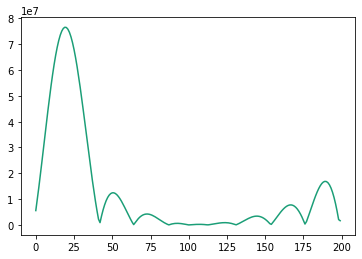

In [82]:
plt.plot(np.abs(xcorr2sum))

In [38]:
chans

array([7337, 7338, 7339, 7340, 7341, 7342, 7343, 7344])

Text(0.5, 1.0, 'unwrapped')

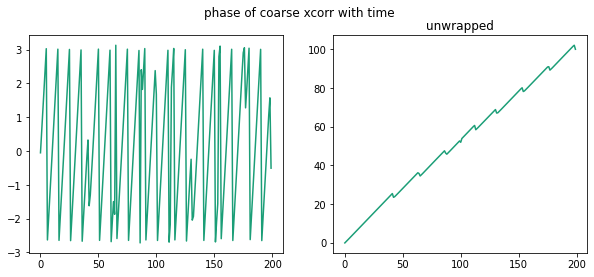

In [45]:
f=plt.gcf()
f.set_size_inches(10,4)
plt.suptitle('phase of coarse xcorr with time')
plt.subplot(121)
plt.plot(np.angle(xcorr2sum),'-')
# plt.xlim(0,10)
plt.subplot(122)
plt.plot(np.unwrap(np.angle(xcorr2sum)),'-')
plt.title('unwrapped')

# plt.xlim(6,12)

In [46]:
y=np.unwrap(np.angle(xcorrtime2[0:25,0]))
m,c=np.polyfit(np.arange(0,len(y)),y,1)
m/(np.pi*2)

0.09967462058577573

In [89]:
y=np.unwrap(np.angle(xcorrtime2[:25,0]))
m,c=np.polyfit(np.arange(0,len(y))*4096,y,1)
print(m*4096/(2*np.pi))
x=np.arange(0,xcorrtime2.shape[0]*4096)
newphase=(m+2*np.pi*1835/4096)*x+c#-2*np.pi*1150*60
cs=CubicSpline(np.arange(0,xcorrtime2.shape[0])*4096,np.abs(xcorrtime2[:,0]))
newmag=cs(x)
# newmag = np.interp(x,np.arange(0,len(y))*4096,np.abs(c1full))
zz1=newmag*np.exp(1J*newphase)

0.09967462058577573


In [ ]:
y=np.unwrap(np.angle(xcorrtime2[:50,1]))
m,c=np.polyfit(np.arange(0,len(y))*4096,y,1)
print(m*4096/(2*np.pi))
x=np.arange(0,xcorrtime2.shape[0]*4096)
newphase=(m+2*np.pi*1845/4096)*x+c#-2*np.pi*1150*60
cs=CubicSpline(np.arange(0,xcorrtime2.shape[0])*4096,np.abs(xcorrtime2[:,1]))
newmag=cs(x)
# newmag = np.interp(x,np.arange(0,len(y))*4096,np.abs(c1full))
zz2=newmag*np.exp(1J*newphase)

In [ ]:
plt.plot(np.real(zz1))
plt.plot(np.real(zz2))
m=31000
plt.xlim(m-100,m+100)

In [ ]:
plt.plot(np.real(zz1)+np.real(zz2))
m=31000
plt.xlim(m-4000,m+4000)

In [90]:
bb=np.real(zz1)

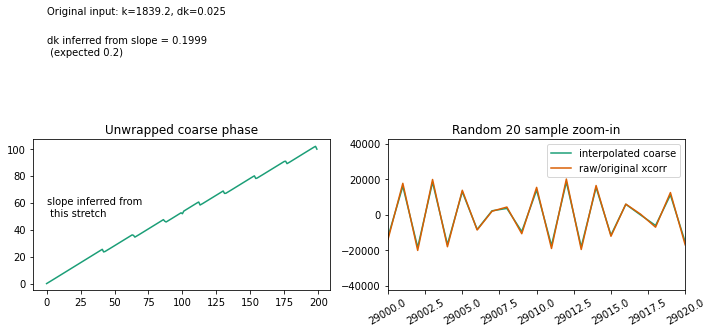

In [92]:
amp2=np.sum(bb*xcorrtime1)/np.sum(bb**2)

f=plt.gcf()
f.set_size_inches(10,8)
f.set_facecolor('white')
plt.subplot(121)
plt.plot(np.unwrap(np.angle(xcorrtime2[:,0])))
plt.title("Unwrapped coarse phase")
plt.text(0,50,'slope inferred from\n this stretch')
plt.text(0,200,'Original input: k=1839.2, dk=0.025')
plt.text(0,170,'dk inferred from slope = 0.1999\n (expected 0.2)')

plt.subplot(122)
plt.title('Random 20 sample zoom-in')
plt.plot(amp2*bb,label='interpolated coarse')
plt.plot(xcorrtime1,label='raw/original xcorr')
plt.legend()
plt.xlim(29000,29020)
plt.xticks(rotation=30)
plt.tight_layout()

In [ ]:
bigz=zz1+zz2
bb=np.real(bigz)

In [ ]:
np.argmax(np.abs(bigz))

In [ ]:
plt.plot(np.real(bigz))
plt.xlim(31000-4096,31000+4096)

In [95]:
-np.angle(zz1[80000])*4096/(2*np.pi)/1835

0.501099285136789

In [ ]:
zeropts=np.where(np.abs(np.angle(bigz))<1e-2)[0]

In [ ]:
zeropts[100:]

In [ ]:
amp2=np.sum(bb*xcorrtime1)/np.sum(bb**2)

f=plt.gcf()
f.set_size_inches(10,8)
f.set_facecolor('white')
plt.subplot(121)
plt.plot(np.unwrap(np.angle(xcorrtime2[:,0])))
plt.title("Unwrapped coarse phase")
plt.text(0,50,'slope inferred from\n this stretch')
plt.text(0,200,'Original input: k=1839.2, dk=0.025')
plt.text(0,170,'dk inferred from slope = 0.1999\n (expected 0.2)')

plt.subplot(122)
plt.title('Random 20 sample zoom-in')
plt.plot(amp2*bb,label='interpolated coarse')
plt.plot(xcorrtime1,label='raw/original xcorr')
plt.legend()
plt.xlim(29000,29020)
plt.xticks(rotation=30)
plt.tight_layout()

In [ ]:
plt.title('Random 20 sample zoom-in')
plt.plot(amp2*bb,label='interpolated coarse')
plt.plot(xcorrtime1,label='raw/original xcorr')
plt.legend()
plt.xlim(29400,29450)
plt.xticks(rotation=30)

In [ ]:
-np.angle(zz1[31000])*4096/1835.2/(2*np.pi)

In [ ]:
8-31000/4096

In [ ]:
(8-31000.3/4096)*4096

In [ ]:
xx=mycorr(p0,p1)

In [ ]:
plt.plot(np.real(xcorrtime2))
# plt.plot()

In [ ]:
plt.plot(np.angle(xcorrtime2))